In [20]:
!pip install prophet



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\pc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import sys
from prophet import Prophet


C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset = pd.read_csv(r"C:\Users\pc\OneDrive\Desktop\Final year project\prophet_gold_price\gold_and_usdx.csv",parse_dates=["Date"])
dataset.head()

,Date,USD,usdx
0,1979-12-26,473.1,85.99
1,1979-12-27,473.1,85.51
2,1979-12-28,512,85.81
3,1979-12-31,512,85.82
4,1980-01-02,559.5,85.32


In [4]:
df = dataset.dropna()
df.isnull().sum()

Date    0
USD     0
usdx    0
dtype: int64

In [5]:
df.tail()

,Date,USD,usdx
11700,2025-04-17,3327.365,99.38
11701,2025-04-21,3424.405,98.28
11702,2025-04-22,3381.16,98.92
11703,2025-04-23,3288.33,99.84
11704,2025-04-24,3349.595,99.38


In [25]:
df.describe()

,Date,usdx
count,11705,11705.000000
mean,2002-09-22 04:17:51.542076032,96.463328
min,1979-12-26 00:00:00,71.330000
25%,1991-06-06 00:00:00,86.190000
50%,2002-09-17 00:00:00,94.480000
75%,2014-01-23 00:00:00,102.270000
max,2025-04-24 00:00:00,164.720000
std,NaN,14.821972


In [26]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values("Date")


In [27]:
px.line(data_frame = df, x= "Date", y = "USD")


In [28]:
df['USD'] = df['USD'].astype(str).str.replace(',', '').astype(float)
df['usdx'] = df['usdx'].astype(str).str.replace(',', '').astype(float)


PREDICTING THE usdx FIRST TO USE AS A REGRESSOR

In [29]:
df_usd = df[["Date", "usdx"]].rename(columns={"Date": "ds", "usdx": "y"})
usd_model = Prophet()
usd_model.fit(df_usd)
future_usd = usd_model.make_future_dataframe(periods=360)
forecast_usd = usd_model.predict(future_usd)

usd_future = forecast_usd[["ds", "yhat"]].rename(columns={"yhat": "usdx"})



17:23:07 - cmdstanpy - INFO - Chain [1] start processing
17:23:20 - cmdstanpy - INFO - Chain [1] done processing


In [30]:
df_gold = df[["Date", "USD", "usdx"]].rename(columns={"Date": "ds", "USD": "y"})
df_gold.tail()

,ds,y,usdx
11700,2025-04-17,3327.365,99.38
11701,2025-04-21,3424.405,98.28
11702,2025-04-22,3381.160,98.92
11703,2025-04-23,3288.330,99.84
11704,2025-04-24,3349.595,99.38


In [31]:
gold_model = Prophet()
gold_model.add_regressor("usdx")



In [32]:
gold_model.fit(df_gold)

17:23:23 - cmdstanpy - INFO - Chain [1] start processing
17:23:35 - cmdstanpy - INFO - Chain [1] done processing


In [33]:
future_gold = gold_model.make_future_dataframe(periods=360)
future_gold = future_gold.merge(usd_future, on="ds", how="left")


In [34]:
future_gold

,ds,usdx
0,1979-12-26,80.975975
1,1979-12-27,81.001904
2,1979-12-28,81.080060
3,1979-12-31,81.170437
4,1980-01-02,81.257176
...,...,...
12060,2026-04-15,104.555236
12061,2026-04-16,104.526871
12062,2026-04-17,104.547946
12063,2026-04-18,106.717426


In [35]:
gold_forecast = gold_model.predict(future_gold)


In [36]:
gold_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1979-12-26,635.409862,513.333782,754.516228
1,1979-12-27,635.692608,522.059902,745.998254
2,1979-12-28,635.244205,514.346002,764.458623
3,1979-12-31,636.443054,519.399451,748.960796
4,1980-01-02,636.819974,516.230269,744.852660
...,...,...,...,...
12060,2026-04-15,2549.404177,2419.883019,2671.039205
12061,2026-04-16,2549.733857,2430.862818,2674.659836
12062,2026-04-17,2549.129415,2427.076352,2670.244248
12063,2026-04-18,2468.507868,2339.682155,2590.447154


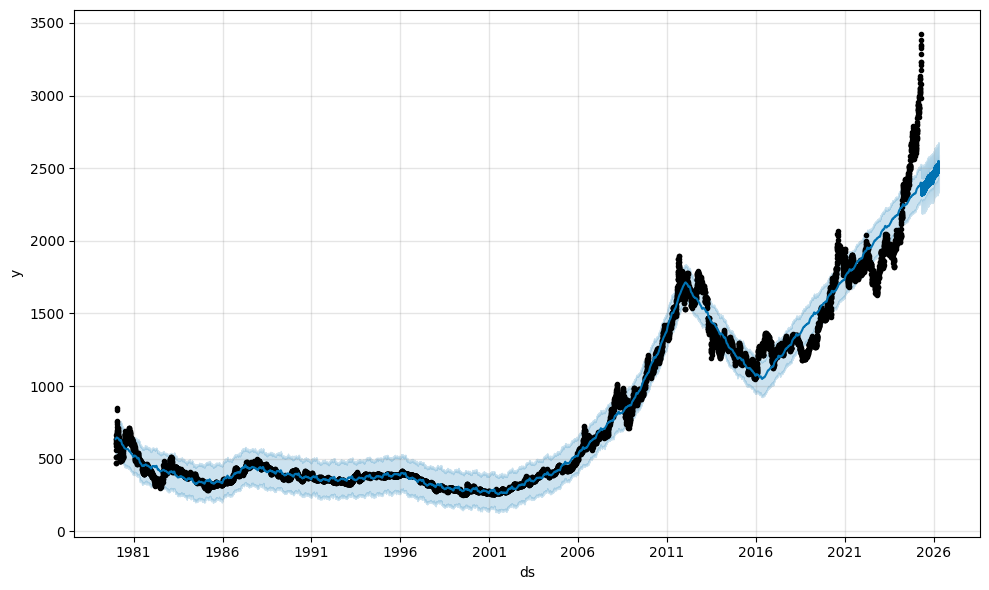

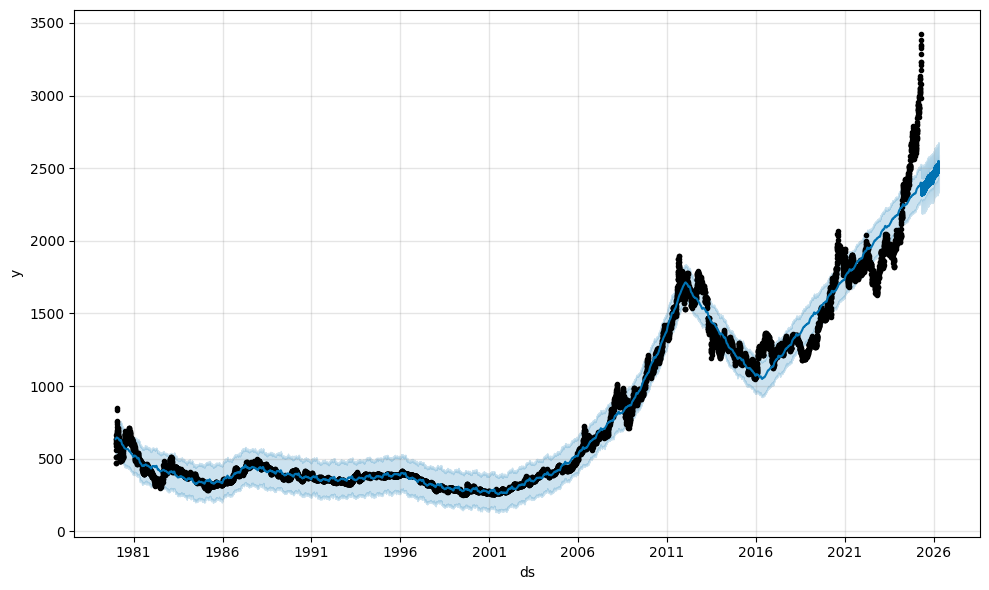

In [37]:
gold_model.plot(gold_forecast)

In [38]:
import plotly.graph_objs as go


# Create a figure with the original data and the predictions
fig = go.Figure(data=[
    go.Scatter(x=df_gold['ds'], y=df_gold['y'], name='Original Data'),
    go.Scatter(x=gold_forecast['ds'], y=gold_forecast['yhat'], name='Predictions',),
])

# Update the layout
fig.update_layout(title='Predictions', xaxis_title='Date', yaxis_title='Value')

# Show the plot
fig.show()

In [39]:
# Example user input (could be from a form or dropdown in web app)
user_input_date = '2025-07-4'  # Make sure it's in YYYY-MM-DD format

# Convert to datetime just in case
import pandas as pd
user_input_date = pd.to_datetime(user_input_date)

# Filter preds for that date
predicted_row = gold_forecast[gold_forecast['ds'] == user_input_date]

# Check if prediction exists
if not predicted_row.empty:
    predicted_value = predicted_row['yhat'].values[0]
    print(f"Predicted gold price for {user_input_date.date()} is: {predicted_value:.2f}")
else:
    print("Selected date is out of the prediction range.")


Predicted gold price for 2025-07-04 is: 2404.03


In [40]:
from sklearn.metrics import r2_score


q= df_gold['y'].values

p= gold_forecast['yhat'].values
p_aligned = p[:len(q)]

r2 = r2_score(q,p_aligned)
print(f'R² score: {r2}')

R² score: 0.9752295430388159


In [41]:
import joblib
joblib.dump(gold_forecast, r'C:\Users\pc\OneDrive\Desktop\Final year project\prophet_gold_price\prophet_model.pkl')
gold_forecast.to_csv(r'C:\Users\pc\OneDrive\Desktop\Final year project\prophet_gold_price\forecast.csv', index=False)

